In [ ]:
# Ìå®Îî©
max_words = 5000    
max_len=50         

def tokenize_pad_sequences(text):
    '''
    This function tokenizes the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df2['cleantext2'][0])
X, tokenizer = tokenize_pad_sequences(df2['cleantext2'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 ont long posit v2 entri 0 7179 target 0 7213 stop 0 7106 binanc bitcoin signal buy ontusdt ont 
After Tokenization & Padding 
 [3205   75  224 1468  327   17  176   17  202   17   12    1   81   19
 3205    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
class0=[]
for i in range(len(df2)):
    if df2.loc[i,'vader_neg']>0:
        class0+=[-1]
    elif df2.loc[i,'vader_pos']>0:
        class0+=[1]        
    else:
        class0+=[0]    

In [ ]:
df2['class']=class0
df2['class'].value_counts()

 1    4036
 0    3687
-1    2277
Name: class, dtype: int64

In [ ]:
y = pd.get_dummies(df2['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (6000, 50) (6000, 3)
Validation Set:  (2000, 50) (2000, 3)
Test Set:  (2000, 50) (2000, 3)


In [ ]:
# Í∞ÄÏ§ëÏπò ÌñâÎ†¨
embedding_matrix = np.zeros((vocab_size, 300))
np.shape(embedding_matrix)

# ÌïôÏäµÏóê ÏÇ¨Ïö©ÎêòÎäî Îã®Ïñ¥Ïùò ÏàòÎ•º ÌôïÏù∏
# Ìå®Îî© ÎïåÎ¨∏Ïóê + 1 

vocab_size = len(tokenizer.index_word) + 1
vocab_size

(20224, 300)

In [ ]:
# Ìä∏ÏúÑÌÑ∞ Sentiment Î•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÏùÑ Íµ¨Ï∂ï 
model0 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(10000, 128),
  tf.keras.layers.LSTM(128),
  tf.keras.layers.Dense(3, activation='softmax')])

model0.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model0.fit(X_train, y_train,
          batch_size=128,
          epochs=100,
          validation_split = 0.2)

Epoch 1/100
38/38 [==============================] - 13s 283ms/step - loss: 1.0689 - accuracy: 0.4056 - val_loss: 1.0477 - val_accuracy: 0.4083
Epoch 2/100
38/38 [==============================] - 10s 258ms/step - loss: 0.8751 - accuracy: 0.5800 - val_loss: 0.7851 - val_accuracy: 0.6300
Epoch 3/100
38/38 [==============================] - 11s 279ms/step - loss: 0.5870 - accuracy: 0.7362 - val_loss: 0.6751 - val_accuracy: 0.6983
Epoch 4/100
38/38 [==============================] - 10s 260ms/step - loss: 0.3863 - accuracy: 0.8458 - val_loss: 0.7089 - val_accuracy: 0.7417
Epoch 5/100
38/38 [==============================] - 10s 261ms/step - loss: 0.2736 - accuracy: 0.9115 - val_loss: 0.9388 - val_accuracy: 0.7625
Epoch 6/100
38/38 [==============================] - 10s 261ms/step - loss: 0.2521 - accuracy: 0.9242 - val_loss: 0.6341 - val_accuracy: 0.8117
Epoch 7/100
38/38 [==============================] - 10s 261ms/step - loss: 0.1990 - accuracy: 0.9438 - val_loss: 0.7286 - val_accuracy:

In [ ]:
# Evaluate model on the test set
model0.evaluate(X_test, y_test, verbose=0)

# Í∞ÅÍ∞Å loss, accuracy 

[0.7112246751785278, 0.8690000176429749]

# **Sentiment AnalysisÏùò Í≤∞Í≥ºÎ•º Í∏∞Î∞òÏúºÎ°ú ÎπÑÌä∏Ïùò ÏÉÅÌïòÎ∞©ÏùÑ ÏòàÏ∏°ÌïòÍ∏∞**

- ÎπÑÌä∏ÏΩîÏù∏Ïùò ÏÉÅÌïòÎ∞© Ïó¨Î∂ÄÎäî Ìï¥Îãπ Ìä∏ÏúóÏùò ÏùºÎ¥â ÎßàÍ∞êÏùÑ Í∏∞Ï§ÄÏúºÎ°ú(ÏÉÅÎ∞© 1, ÌïòÎ∞© 0) ÌïúÎã§.Ïù¥Ïóê Ï†ÅÌï©Ìïú EDAÍ∞Ä ÌïÑÏöîÌï®. Ìä∏ÏúÑÌÑ∞ Îç∞Ïù¥ÌÑ∞Ïùò 'DATE' Î•º EDA Ìï¥Ï§Ñ Í≤É 

In [ ]:
df2['date']

0       2021-07-03 10:56:56
1       2022-03-15 09:40:37
2       2022-02-09 18:35:47
3       2021-11-11 17:17:32
4       2021-11-25 16:01:31
               ...         
9995    2021-12-17 13:26:16
9996    2021-08-24 16:55:50
9997    2022-01-22 11:11:39
9998    2022-01-20 02:28:11
9999    2021-10-21 00:16:49
Name: date, Length: 10000, dtype: object

In [ ]:
# Ïã§ÏãúÍ∞Ñ ÎπÑÌä∏ÏΩîÏù∏ Í∞ÄÍ≤©ÏùÑ Í∞ÄÏ†∏Ïò®Îã§ 
# 2021ÎÖÑ 1Ïõî Î∂ÄÌÑ∞Ïùò Îç∞Ïù¥ÌÑ∞Î°ú ÏãúÏûë

def get_crypto_price(symbol, exchange, start_date = None):
    api_key = 'YOUR API KEY'
    api_url = f'https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol={symbol}&market={exchange}&apikey={api_key}'
    raw_df = requests.get(api_url).json()
    df = pd.DataFrame(raw_df['Time Series (Digital Currency Daily)']).T
    df = df.rename(columns = {'1a. open (USD)': 'open', '2a. high (USD)': 'high', '3a. low (USD)': 'low', '4a. close (USD)': 'close', '5. volume': 'volume'})
    for i in df.columns:
        df[i] = df[i].astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.iloc[::-1].drop(['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)', '6. market cap (USD)'], axis = 1)
    if start_date:
        df = df[df.index >= start_date]
    return df

btc_0 = get_crypto_price(symbol = 'BTC', exchange = 'USD', start_date = '2021-02-05')
btc_0

open      high       low     close         volume
2021-02-05  36936.65  38310.12  36570.00  38290.24   66681.334275
2021-02-06  38289.32  40955.51  38215.94  39186.94   98757.311183
2021-02-07  39181.01  39700.00  37351.00  38795.69   84363.679763
2021-02-08  38795.69  46794.45  37988.89  46374.87  138597.536914
2021-02-09  46374.86  48142.19  44961.09  46420.42  115499.861712
...              ...       ...       ...       ...            ...
2022-04-24  39441.61  39940.00  38929.62  39450.13   26703.611860
2022-04-25  39450.12  40616.00  38200.00  40426.08   63037.127840
2022-04-26  40426.08  40797.31  37702.26  38112.65   66650.258000
2022-04-27  38112.64  39474.72  37881.31  39235.72   57083.122720
2022-04-28  39235.72  39373.02  39152.96  39362.65     650.895660

[448 rows x 5 columns]

In [ ]:
# ÎÇ†Ïßú -> Ïù∏Îç±Ïä§Î°ú ÎπºÍ∏∞
btc_0 = btc_0.reset_index()

In [ ]:
btc_0['index'] = pd.to_datetime(btc_0['index'], unit='s')
btc_0.index = btc_0['index']
btc_0_grouped = btc_0.resample('D')['close'].mean()

In [ ]:
tweets = df2.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']
tweets_grouped = tweets.resample('1h').sum()

In [ ]:
tweets_grouped

user_followers  user_friends  user_favourites  \
date                                                                 
2021-02-05 12:00:00           957.0         734.0           2780.0   
2021-02-05 13:00:00             0.0           0.0              0.0   
2021-02-05 14:00:00          4154.0          76.0             46.0   
2021-02-05 15:00:00             0.0           0.0              0.0   
2021-02-05 16:00:00           131.0           5.0              4.0   
...                             ...           ...              ...   
2022-04-22 19:00:00         57442.0        4064.0          83132.0   
2022-04-22 20:00:00          5955.0        4313.0          41186.0   
2022-04-22 21:00:00           373.0         283.0            102.0   
2022-04-22 22:00:00           181.0         386.0           7718.0   
2022-04-22 23:00:00          1661.0         750.0          41498.0   

                     user_verified  is_retweet  vader_neg  vader_neu  \
date                                                                   
2021-02-05 12:00:00              0           0      0.000      0.798   
2021-02-05 13:00:00              0           0      0.000      0.000   
2021-02-05 14:00:00              0           0      0.000      1.000   
2021-02-05 15:00:00              0           0      0.000      0.000   
2021-02-05 16:00:00              0           0      0.000      1.000   
...                            ...         ...        ...        ...   
2022-04-22 19:00:00              0           0      0.000      8.404   
2022-04-22 20:00:00              0           0      0.367      7.596   
2022-04-22 21:00:00              0           0      0.000      2.723   
2022-04-22 22:00:00              0           0      0.050      2.950   
2022-04-22 23:00:00              0           0      0.104      4.427   

                     vader_pos  vader_comp  class  
date                                               
2021-02-05 12:00:00      0.202      0.5106      1  
2021-02-05 13:00:00      0.000      0.0000      0  
2021-02-05 14:00:00      0.000      0.0000      0  
2021-02-05 15:00:00      0.000      0.0000      0  
2021-02-05 16:00:00      0.000      0.0000      0  
...                        ...         ...    ...  
2022-04-22 19:00:00      0.596      2.2009      5  
2022-04-22 20:00:00      1.037      3.3339      3  
2022-04-22 21:00:00      0.277      0.8718      2  
2022-04-22 22:00:00      0.000     -0.2732     -1  
2022-04-22 23:00:00      0.469      0.7980      0  

[10596 rows x 10 columns]

In [ ]:
beginning = max(tweets_grouped.index.min().replace(tzinfo=None), btc_0_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), btc_0_grouped.index.max())
tweets_grouped = tweets_grouped[beginning:end]
btc_0_grouped = btc_0_grouped[beginning:end]

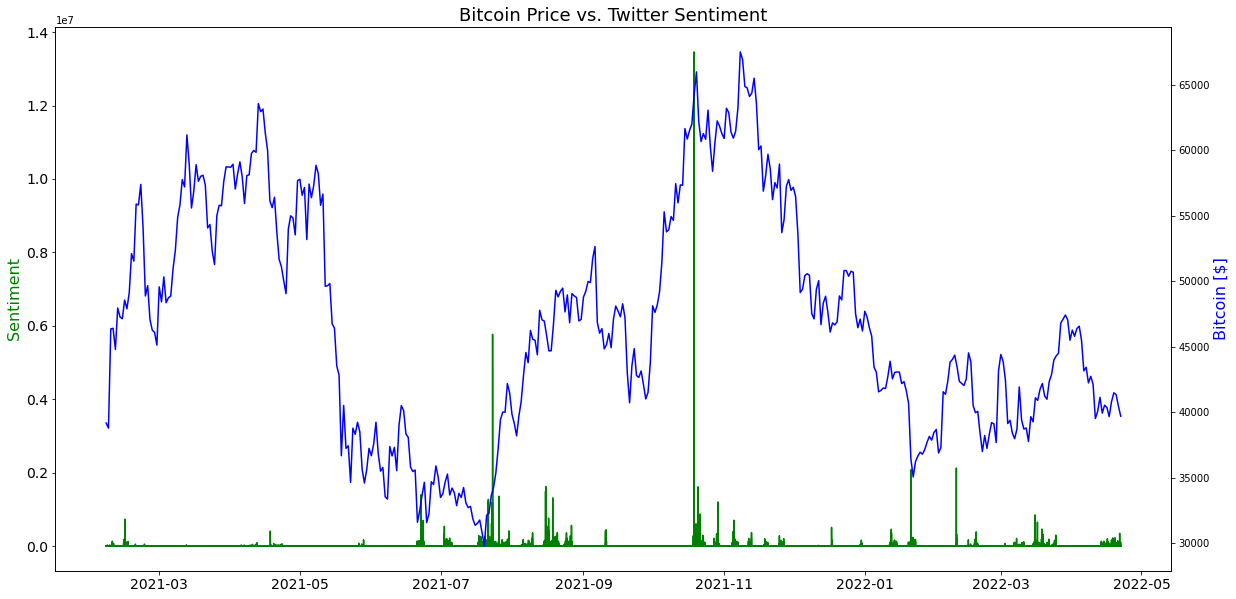

In [ ]:
# ÎπÑÌä∏ÏΩîÏù∏ Í∞ÄÍ≤©Í≥º Sentiment Î•º ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑ 

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Bitcoin Price vs. Twitter Sentiment", fontsize=18) # Ï†úÎ™© ÏàòÏ†ïÌïòÍ∏∞ 
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(btc_0_grouped.index, btc_0_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
plt.show()

In [ ]:
# object ÏóêÏÑú datetime64[ns]Î°ú ÏûêÎ£åÌòï Î≥ÄÌôò 
df2['date'] = pd.to_datetime(df2['date'])


In [ ]:
#ÏûêÎ£åÌòï Î≥ÄÌôò ÌõÑ Î∂Ñ,ÏãúÍ∞Ñ,Ï¥à ÎìúÎûçÌïòÍ∏∞ -> DateMod ÏπºÎüºÏóê Ï†ÄÏû• 
df2['DateMod'] = df2['date'].dt.floor('d')
df2 

In [ ]:
df3 = df2

In [ ]:
pd.merge(df3, btc_0, on="DateMod")

In [ ]:
df2['vader_comp']

0       0.2960
1       0.4939
2       0.5719
3       0.0000
4      -0.5423
         ...  
9995    0.2263
9996    0.0000
9997    0.0000
9998    0.0000
9999    0.6908
Name: vader_comp, Length: 10000, dtype: float64

In [ ]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("ÎπÑÌä∏ÏΩîÏù∏ Í∞ÄÍ≤© vs Twitter Sentiment", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
plt.show()

In [ ]:
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/df2shuffle_date.csv')


In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/df2shuffle_date.csv") #Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞ 

In [ ]:
# ÌïÑÏöîÏóÜÎäî ÏπºÎüº Ï†úÍ±∞ 
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
# df1

In [ ]:
df2

user_name             user_location  \
0                              Hoba Bot                       NaN   
1             ùî°ùî¢ùî£ùî¶ùî±ùîØùîûùî©ùî¶ùî∑ùî¢ùî°‚Ä¢p«ùzƒ±◊ü…ê…π áƒ±…ü«ùp                       NaN   
2                            GORE I.A.D               Deutschland   
3                         satsleft.info     The Bitcoin Timechain   
4                                 Dweep                       NaN   
...                                 ...                       ...   
9995                       Bitcoin tips                       NaN   
9996                    Somnath Sahoo üíé                       NaN   
9997                      Zerinei Mooly   Saint Andrews, Scotland   
9998                              GHCÈõÑËµ∑                       NaN   
9999  Mincent man Gogh ü•≠ The-Batman.ETH  Mangolia, The Mangoverse   

                                       user_description         user_created  \
0     Fearless like a Honey Badger... Bears or Bulls...  2012-12-30 21:55:51   
1     Defitralized ¬© ‚Ä¢ DC of @_dcdao                ...  2015-09-01 23:34:35   
2     telegram https://t.co/ui9meh3B41\nMOD https://...  2021-12-03 13:05:19   
3     Reporting on the remaining #Bitcoin supply to ...  2021-10-14 21:31:42   
4           Vocalist, Musician, Author\n-CRYPTO maniac-  2017-08-17 15:01:18   
...                                                 ...                  ...   
9995                                                NaN  2017-09-21 09:19:00   
9996                   @Cardano  @CotiNetwork \n@Ripple  2017-01-15 02:33:18   
9997         +100 I Per Day\n#pinetwork #BTC\n#polydoge  2013-09-30 12:11:16   
9998                                                NaN  2022-01-17 03:06:46   
9999  Creator of the Mangoverse - Mangolia Gallery (...  2020-11-16 02:19:55   

      user_followers  user_friends  user_favourites  user_verified  \
0            13144.0           7.0            143.0          False   
1              132.0        2387.0           8030.0          False   
2               44.0         397.0           5689.0          False   
3               92.0         251.0             12.0          False   
4                8.0          49.0            283.0          False   
...              ...           ...              ...            ...   
9995            58.0         223.0             85.0          False   
9996           135.0         319.0          13924.0          False   
9997           186.0         591.0            654.0          False   
9998             1.0           4.0            212.0          False   
9999         13369.0       13546.0          68191.0          False   

                    date                                               text  \
0    2021-07-03 10:56:56  üöÄüöÄüöÄ $ONT Long Position(v2) üöÄüöÄüöÄ\n\nEntry: 0.717...   
1    2022-03-15 09:40:37  10% discount\nhttps://t.co/1360Y2IRC7\n\n #BTC...   
2    2022-02-09 18:35:47  @crypto_bearr Join us In #Aether Before the la...   
3    2021-11-11 17:17:32  üëã A new block was found on the #Bitcoin networ...   
4    2021-11-25 16:01:31  @CryptoWhale Its just whale games. Plan B made...   
...                  ...                                                ...   
9995 2021-12-17 13:26:16          @saylor It's almost ready to fly #Bitcoin   
9996 2021-08-24 16:55:50    #Bitcoin New Price Predication 4th September 21   
9997 2022-01-22 11:11:39  whoever buys bitcoin means he wins the future ...   
9998 2022-01-20 02:28:11  @VT6688 @GenxAnalytics @GalaxyHeroesGHC @rarib...   
9999 2021-10-21 00:16:49  Watching the #ETH and #BTC charts like: https:...   

      ...               source is_retweet  \
0     ...              HoBaBot      False   
1     ...  Twitter for Android      False   
2     ...  Twitter for Android      False   
3     ...             satsleft      False   
4     ...  Twitter for Android      False   
...   ...                  ...        ...   
9995  ...  Twitter for Android      False   
9996  ...

In [ ]:
df2= df2.groupby([df2['DateMod'].dt.date]).mean()
df2

user_followers  user_friends  user_favourites  user_verified  \
DateMod                                                                    
2021-02-05     1994.285714    501.000000      2004.428571       0.000000   
2021-02-06     3119.500000   2596.900000      1274.400000       0.000000   
2021-02-07     4585.888889   3602.111111      2935.555556       0.000000   
2021-02-08     6374.850000    486.700000      8881.300000       0.000000   
2021-02-09     3115.333333    146.777778      9799.333333       0.000000   
...                    ...           ...              ...            ...   
2022-04-18     4479.049689    873.316770      8823.602484       0.006211   
2022-04-19     6439.160221    777.972376      3621.591160       0.005525   
2022-04-20     4132.268293   1366.707317      8383.463415       0.000000   
2022-04-21     6462.631068    566.242718      4453.155340       0.019417   
2022-04-22     8782.640000    817.256000      6595.624000       0.024000   

            is_retweet  vader_neg  vader_neu  vader_pos  vader_comp     class  
DateMod                                                                        
2021-02-05         0.0   0.014857   0.901286   0.083857    0.174700  0.285714  
2021-02-06         0.0   0.000000   0.863400   0.136600    0.323380  0.600000  
2021-02-07         0.0   0.000000   0.958333   0.041667    0.079822  0.111111  
2021-02-08         0.0   0.004700   0.908050   0.087250    0.165640  0.300000  
2021-02-09         0.0   0.035667   0.896222   0.068111    0.029989  0.111111  
...                ...        ...        ...        ...         ...       ...  
2022-04-18         0.0   0.027832   0.891571   0.080596    0.143122  0.111801  
2022-04-19         0.0   0.018762   0.874597   0.106641    0.246082  0.320442  
2022-04-20         0.0   0.052463   0.868268   0.079244    0.059080 -0.121951  
2022-04-21         0.0   0.036942   0.874680   0.088359    0.132678  0.067961  
2022-04-22         0.0   0.033280   0.846112   0.120632    0.236735  0.264000  

[140 rows x 10 columns]

In [ ]:
# 'price_updown' Ïª¨Îüº : Í∞ÄÍ≤©Ïù¥ ÏÉÅÏäπÏúºÎ°ú ÎßàÍ∞êÌïòÎ©¥ 1, ÌïòÎùΩÏúºÎ°ú ÎßàÍ∞êÌïòÎ©¥ 0 ÏúºÎ°ú Î≥ÄÌôò 
df2

DateMod  user_followers  user_friends  user_favourites  user_verified  \
0     2021.2.5     1994.285714    501.000000      2004.428571       0.000000   
1     2021.2.6     3119.500000   2596.900000      1274.400000       0.000000   
2     2021.2.7     4585.888889   3602.111111      2935.555556       0.000000   
3     2021.2.8     6374.850000    486.700000      8881.300000       0.000000   
4     2021.2.9     3115.333333    146.777778      9799.333333       0.000000   
..         ...             ...           ...              ...            ...   
135  2022.4.18     4479.049689    873.316770      8823.602484       0.006211   
136  2022.4.19     6439.160221    777.972376      3621.591160       0.005525   
137  2022.4.20     4132.268293   1366.707317      8383.463415       0.000000   
138  2022.4.21     6462.631068    566.242718      4453.155340       0.019417   
139  2022.4.22     8782.640000    817.256000      6595.624000       0.024000   

     is_retweet  vader_neg  vader_neu  vader_pos  vader_comp     class  \
0             0   0.014857   0.901286   0.083857    0.174700  0.285714   
1             0   0.000000   0.863400   0.136600    0.323380  0.600000   
2             0   0.000000   0.958333   0.041667    0.079822  0.111111   
3             0   0.004700   0.908050   0.087250    0.165640  0.300000   
4             0   0.035667   0.896222   0.068111    0.029989  0.111111   
..          ...        ...        ...        ...         ...       ...   
135           0   0.027832   0.891571   0.080596    0.143122  0.111801   
136           0   0.018762   0.874597   0.106641    0.246082  0.320442   
137           0   0.052463   0.868268   0.079244    0.059080 -0.121951   
138           0   0.036942   0.874680   0.088359    0.132678  0.067961   
139           0   0.033280   0.846112   0.120632    0.236735  0.264000   

     price_updown  
0               1  
1               1  
2               0  
3               1  
4               1  
..            ...  
135             1  
136             1  
137             0  
138             0  
139             0  

[140 rows x 12 columns]

In [ ]:
# object ÏóêÏÑú datetime64[ns]Î°ú ÏûêÎ£åÌòï Î≥ÄÌôò 
df2['DateMod'] = pd.to_datetime(df2['DateMod'])

#ÏûêÎ£åÌòï Î≥ÄÌôò ÌõÑ Î∂Ñ,ÏãúÍ∞Ñ,Ï¥à ÎìúÎûçÌïòÍ∏∞ -> DateMod ÏπºÎüºÏóê Ï†ÄÏû• 
df2['DateMod'] = df2['DateMod'].dt.floor('d')
df2 

DateMod  user_followers  user_friends  user_favourites  user_verified  \
0   2021-02-05     1994.285714    501.000000      2004.428571       0.000000   
1   2021-02-06     3119.500000   2596.900000      1274.400000       0.000000   
2   2021-02-07     4585.888889   3602.111111      2935.555556       0.000000   
3   2021-02-08     6374.850000    486.700000      8881.300000       0.000000   
4   2021-02-09     3115.333333    146.777778      9799.333333       0.000000   
..         ...             ...           ...              ...            ...   
135 2022-04-18     4479.049689    873.316770      8823.602484       0.006211   
136 2022-04-19     6439.160221    777.972376      3621.591160       0.005525   
137 2022-04-20     4132.268293   1366.707317      8383.463415       0.000000   
138 2022-04-21     6462.631068    566.242718      4453.155340       0.019417   
139 2022-04-22     8782.640000    817.256000      6595.624000       0.024000   

     is_retweet  vader_neg  vader_neu  vader_pos  vader_comp     class  \
0             0   0.014857   0.901286   0.083857    0.174700  0.285714   
1             0   0.000000   0.863400   0.136600    0.323380  0.600000   
2             0   0.000000   0.958333   0.041667    0.079822  0.111111   
3             0   0.004700   0.908050   0.087250    0.165640  0.300000   
4             0   0.035667   0.896222   0.068111    0.029989  0.111111   
..          ...        ...        ...        ...         ...       ...   
135           0   0.027832   0.891571   0.080596    0.143122  0.111801   
136           0   0.018762   0.874597   0.106641    0.246082  0.320442   
137           0   0.052463   0.868268   0.079244    0.059080 -0.121951   
138           0   0.036942   0.874680   0.088359    0.132678  0.067961   
139           0   0.033280   0.846112   0.120632    0.236735  0.264000   

     price_updown  
0               1  
1               1  
2               0  
3               1  
4               1  
..            ...  
135             1  
136             1  
137             0  
138             0  
139             0  

[140 rows x 12 columns]

In [ ]:
# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÎÇòÎàÑÍ∏∞ 
from sklearn.model_selection import train_test_split 
train, test = train_test_split(df2, train_size = 0.80,
                               shuffle=True, random_state=121)

In [ ]:
# Dividing the Dataset 
feature = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_comp','class']
target = ['price_updown']

X_train = train[feature]
Y_train = train[target]
X_test = test[feature]
Y_test = test[target]

X_train.shape, X_test.shape

((112, 5), (28, 5))

In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(10000, 128),
  tf.keras.layers.LSTM(128),
  tf.keras.layers.Dense(1, activation='sigmoid')])

model1.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model1.fit(X_train, Y_train,
          batch_size=128,
          epochs=100,
          validation_split = 0.2)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6935 - val_accuracy: 0.4783
Epoch 2/100
1/1 [==============================] - 0s 81ms/step - loss: 0.6932 - accuracy: 0.4944 - val_loss: 0.6929 - val_accuracy: 0.5217
Epoch 3/100
1/1 [==============================] - 0s 80ms/step - loss: 0.6930 - accuracy: 0.5056 - val_loss: 0.6926 - val_accuracy: 0.5217
Epoch 4/100
1/1 [==============================] - 0s 84ms/step - loss: 0.6930 - accuracy: 0.5056 - val_loss: 0.6925 - val_accuracy: 0.5217
Epoch 5/100
1/1 [==============================] - 0s 77ms/step - loss: 0.6930 - accuracy: 0.5056 - val_loss: 0.6926 - val_accuracy: 0.5217
Epoch 6/100
1/1 [==============================] - 0s 74ms/step - loss: 0.6929 - accuracy: 0.5056 - val_loss: 0.6929 - val_accuracy: 0.5217
Epoch 7/100
1/1 [==============================] - 0s 78ms/step - loss: 0.6928 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5217
Epoch 8/100
1/1 [=====

In [ ]:
# Evaluate model on the test set
model1.evaluate(X_test, Y_test, verbose=0)

# Sentiment Analysis Î°ú Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÍ≤å ÎêòÎ©¥ 0.5Ïùò Ï†ïÌôïÎèÑÎ•º Î≥¥ÏûÑ

[0.6931901574134827, 0.5]